A1

In [ ]:
# Import necessary modules
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report

# Constants for file path and parameters
DATA_FILE = "/content/IRCTC_Data.xlsx"
DATA_SHEET = "Stock_Values"
TEST_RATIO = 0.2
SEED = 42
FEATURES = ['Opening', 'High_Price', 'Low_Price', 'Closing']
LABEL = 'Outcome'

# Load dataset from Excel
def fetch_dataset(file, sheet):
    try:
        dataset = pd.read_excel(file, sheet_name=sheet)
        return dataset
    except Exception as error:
        print(f"Failed to read file: {error}")
        return None

# Data preparation and feature engineering
def refine_dataset(data):
    if data is None or data.empty:
        print("No data available for processing.")
        return None

    data['Closing'] = pd.to_numeric(data['Closing'], errors='coerce')
    data.dropna(inplace=True)
    data['Future_Price'] = data['Closing'].shift(-1)
    data['Outcome'] = (data['Future_Price'] > data['Closing']).astype(int)
    data.dropna(inplace=True)
    return data

# Partition data and normalize
def partition_and_normalize(data, predictors, target, ratio, seed):
    if data is None:
        print("Data unavailable for partitioning.")
        return None, None, None, None

    X = data[predictors]
    y = data[target]
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=ratio, random_state=seed)

    normalizer = StandardScaler()
    X_train_norm = normalizer.fit_transform(X_train)
    X_val_norm = normalizer.transform(X_val)

    return X_train_norm, X_val_norm, y_train, y_val

# Build and train classifier
def build_and_train(X_train, y_train, seed):
    if X_train is None or y_train is None:
        print("No input for training phase.")
        return None

    classifier = RandomForestClassifier(random_state=seed)
    classifier.fit(X_train, y_train)
    return classifier

# Model evaluation and metrics
def assess_performance(classifier, X_data, y_data, label):
    if classifier is None or X_data is None or y_data is None:
        print(f"Cannot assess {label} data due to incomplete inputs.")
        return None, None

    predictions = classifier.predict(X_data)
    matrix = confusion_matrix(y_data, predictions)
    metrics = classification_report(y_data, predictions)

    print(f"\nConfusion Matrix - {label} Data:")
    print(matrix)
    print(f"\nMetrics Report - {label} Data:")
    print(metrics)

    return matrix, metrics
# Execution
if __name__ == "__main__":
    raw_data = fetch_dataset(DATA_FILE, DATA_SHEET)
    refined_data = refine_dataset(raw_data)

    if refined_data is not None:
        X_train_set, X_test_set, y_train_set, y_test_set = partition_and_normalize(refined_data, FEATURES, LABEL, TEST_RATIO, SEED)
        model = build_and_train(X_train_set, y_train_set, SEED)

        assess_performance(model, X_train_set, y_train_set, "Training")
        assess_performance(model, X_test_set, y_test_set, "Testing")
    else:
        print("Processing terminated due to missing dataset.")


A2

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

# Function to retrieve dataset from Excel
def retrieve_dataset(filepath, worksheet):
    try:
        dataframe = pd.read_excel(filepath, sheet_name=worksheet)
    except ValueError:
        sheet_list = pd.ExcelFile(filepath).sheet_names
        print(f"Sheet '{worksheet}' not found. Options: {sheet_list}")
        raise
    return dataframe

# Function to compute performance indicators
def compute_statistics(real_values, forecasted_values):
    error_mse = mean_squared_error(real_values, forecasted_values)
    error_rmse = np.sqrt(error_mse)
    error_mape = np.mean(np.abs((real_values - forecasted_values) / real_values)) * 100
    error_r2 = r2_score(real_values, forecasted_values)
    return error_mse, error_rmse, error_mape, error_r2

# Core program routine
def execute_workflow():
    source_path = "/content/Session_Data.xlsx"
    source_sheet = "Stock_Analysis"

    data_frame = retrieve_dataset(source_path, source_sheet)
    print("Columns detected:", data_frame.columns)

    observed = data_frame["Close_Price"]
    estimated = data_frame["Predicted_Price"]

    mse, rmse, mape, r2 = compute_statistics(observed, estimated)

    print(f"MSE: {mse:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"MAPE: {mape:.2f}%")
    print(f"R² Score: {r2:.2f}")

# Program entry point
if __name__ == "__main__":
    execute_workflow()

Available columns: Index(['Date', 'Month', 'Day', 'Price', 'Open', 'High', 'Low', 'Volume',
       'Chg%'],
      dtype='object')
Mean Squared Error (MSE): 1216.59
Root Mean Squared Error (RMSE): 34.88
Mean Absolute Percentage Error (MAPE): 1.39%
R²-Score: 0.98


A3

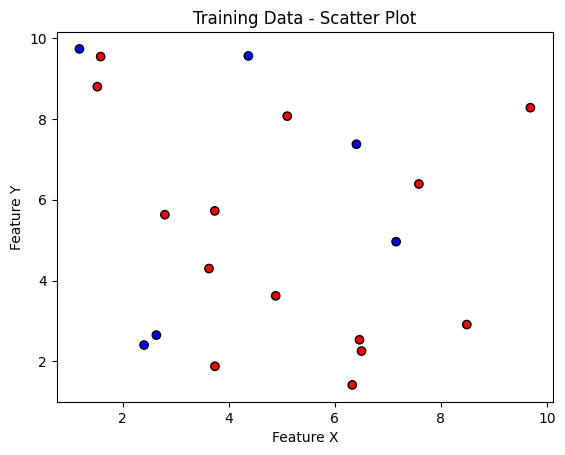

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Function to create random sample points
def create_sample_points(seed_val=42, num_points=20):
    np.random.seed(seed_val)
    coord_set = np.random.uniform([1, 1], [10, 10], (num_points, 2))
    labels = np.random.randint(0, 2, num_points)
    return coord_set, labels
# Function to visualize sample points
def display_scatter_plot(coord_set, labels):
    plt.scatter(coord_set[:, 0], coord_set[:, 1], c=labels, cmap='coolwarm', marker='x', edgecolors='black')
    plt.xlabel("Axis 1")
    plt.ylabel("Axis 2")
    plt.title("Sample Data Visualization")
    plt.grid(True)
    plt.show()
# Main routine to generate and display points
def execute_procedure():
    points, categories = create_sample_points()
    display_scatter_plot(points, categories)
# Initiating program if script is run
to main:
if __name__ == "__main__":
    execute_procedure()

A4

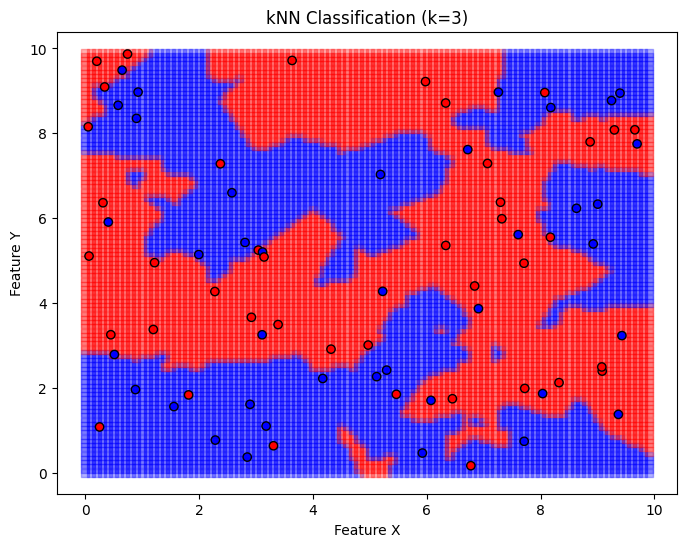

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# Function to create random dataset
def create_dataset(seed_val=42, num_points=100):
    np.random.seed(seed_val)
    coordinates = np.random.rand(num_points, 2) * 10
    labels = np.random.choice([0, 1], size=num_points)
    return coordinates, labels
# Function to partition data
def partition_dataset(features, labels):
    return train_test_split(features, labels, test_size=0.2, random_state=42)
# Function to form mesh grid
def construct_meshgrid(start=0, end=10, step=0.1):
    x_vals = np.arange(start, end, step)
    y_vals = np.arange(start, end, step)
    grid_x, grid_y = np.meshgrid(x_vals, y_vals)
    return np.column_stack((grid_x.ravel(), grid_y.ravel()))
# Function to perform k-Nearest Neighbors
def perform_knn(train_coords, train_labels, test_coords, neighbors=3):
    classifier = KNeighborsClassifier(n_neighbors=neighbors)
    classifier.fit(train_coords, train_labels)
    predictions = classifier.predict(test_coords)
    return predictions
# Function to visualize results
def visualize_results(test_coords, predictions, train_coords, train_labels):
    plt.figure(figsize=(8, 6))
    plt.scatter(test_coords[:, 0], test_coords[:, 1], c=predictions, cmap='coolwarm', alpha=0.3, marker='s')
    plt.scatter(train_coords[:, 0], train_coords[:, 1], c=train_labels, cmap='coolwarm', edgecolors='black', marker='o')
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.title("kNN Classifier Outcome (k=3)")
    plt.show()
# Main workflow
def execute_process():
    coords, labels = create_dataset()
    train_coords, test_coords, train_labels, test_labels = partition_dataset(coords, labels)
    grid_points = construct_meshgrid()
    grid_predictions = perform_knn(train_coords, train_labels, grid_points)
    visualize_results(grid_points, grid_predictions, train_coords, train_labels)
# Run the program if executed directly
if __name__ == "__main__":
    execute_process()

A5

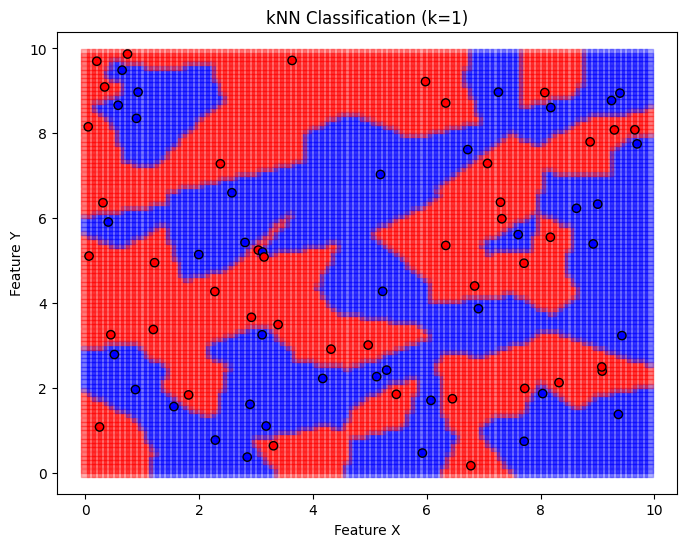

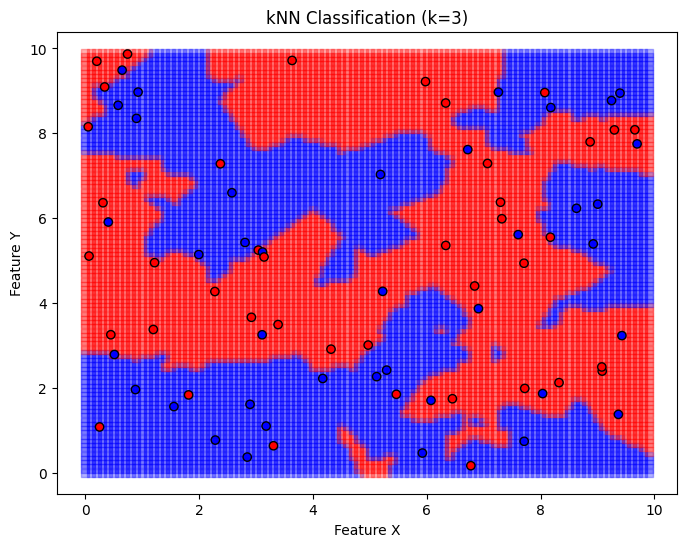

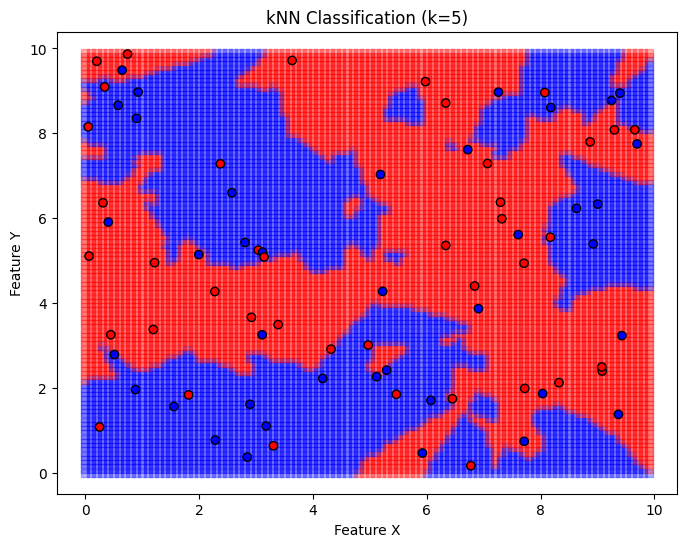

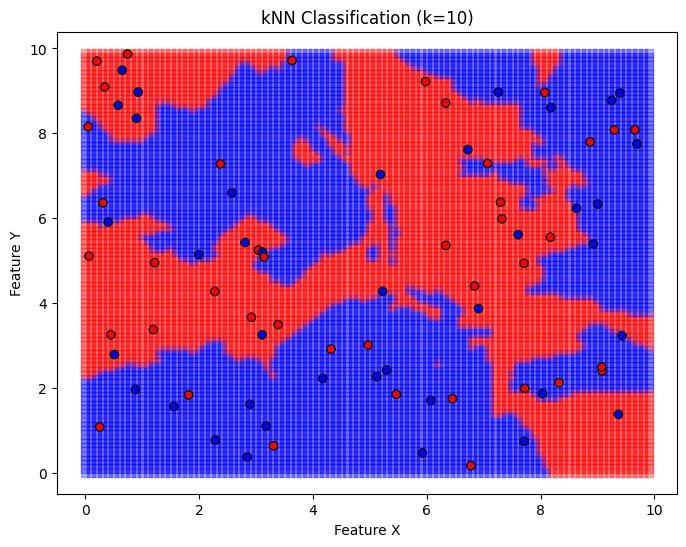

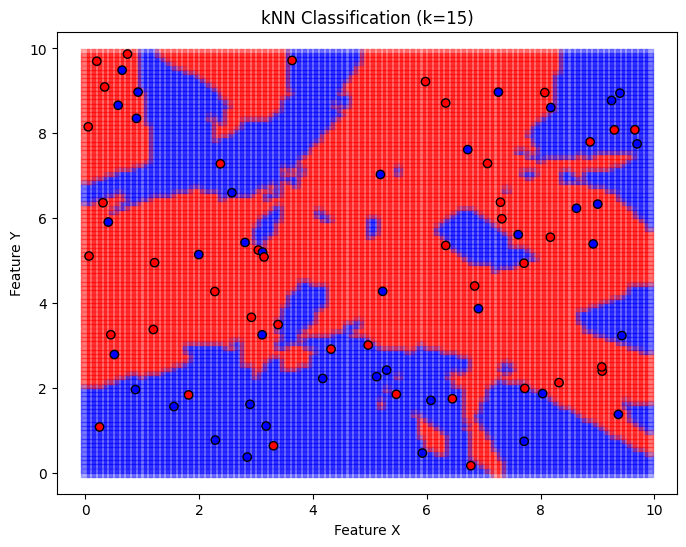

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# Function to create random dataset
def create_dataset(seed_val=42, num_points=100):
    np.random.seed(seed_val)
    coordinates = np.random.rand(num_points, 2) * 10
    labels = np.random.choice([0, 1], size=num_points)
    return coordinates, labels

# Function to partition data
def partition_dataset(features, labels):
    return train_test_split(features, labels, test_size=0.2, random_state=42)

# Function to form mesh grid
def construct_meshgrid(start=0, end=10, step=0.1):
    x_vals = np.arange(start, end, step)
    y_vals = np.arange(start, end, step)
    grid_x, grid_y = np.meshgrid(x_vals, y_vals)
    return np.column_stack((grid_x.ravel(), grid_y.ravel()))

# Function to perform k-Nearest Neighbors
def perform_knn(train_coords, train_labels, test_coords, neighbors=3):
    classifier = KNeighborsClassifier(n_neighbors=neighbors)
    classifier.fit(train_coords, train_labels)
    predictions = classifier.predict(test_coords)
    return predictions

# Function to visualize results
def visualize_results(test_coords, predictions, train_coords, train_labels):
    plt.figure(figsize=(8, 6))
    plt.scatter(test_coords[:, 0], test_coords[:, 1], c=predictions, cmap='coolwarm', alpha=0.3, marker='s')
    plt.scatter(train_coords[:, 0], train_coords[:, 1], c=train_labels, cmap='coolwarm', edgecolors='black', marker='o')
    plt.xlabel("Feature X")
    plt.ylabel("Feature Y")
    plt.title("kNN Classifier Outcome (k=3)")
    plt.show()

# Main workflow
def execute_process():
    coords, labels = create_dataset()
    train_coords, test_coords, train_labels, test_labels = partition_dataset(coords, labels)
    grid_points = construct_meshgrid()
    grid_predictions = perform_knn(train_coords, train_labels, grid_points)
    visualize_results(grid_points, grid_predictions, train_coords, train_labels)

# Run the program if executed directly
if __name__ == "__main__":
    execute_process()

A6

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Verify file existence
file_loc = "Judgment_Embeddings_InLegalBERT.xlsx"
if not pd.io.common.file_exists(file_loc):
    raise FileNotFoundError(f"Error: File '{file_loc}' not found.")

# Load data
records = pd.read_excel(file_loc)

# Confirm 'Label' column is present
if 'Label' not in records.columns:
    raise ValueError("Error: 'Label' column missing. Available columns:", records.columns)

# Select labels 0 and 1
filtered_data = records[records['Label'].isin([0, 1])]
if filtered_data.empty:
    raise ValueError("Error: No records for labels 0 and 1.")

# Separate features and targets
features = filtered_data.drop(columns=['Label']).values
targets = filtered_data['Label'].values
if features.size == 0 or targets.size == 0:
    raise ValueError("Error: No features or targets found.")

# Split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.2, random_state=42)

# Train kNN model with k=3
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)

# Make predictions
train_preds = model.predict(X_train)
test_preds = model.predict(X_test)

# Evaluate results
print("\nTraining Confusion Matrix:\n", confusion_matrix(y_train, train_preds))
print("Training Report:\n", classification_report(y_train, train_preds))
print("\nTesting Confusion Matrix:\n", confusion_matrix(y_test, test_preds))
print("Testing Report:\n", classification_report(y_test, test_preds))

print(f"\nTrain Accuracy: {accuracy_score(y_train, train_preds):.4f}")
print(f"Test Accuracy: {accuracy_score(y_test, test_preds):.4f}")



Confusion Matrix (Train Data):
 [[1039   56]
 [  61  426]]
Classification Report (Train Data):
               precision    recall  f1-score   support

           0       0.94      0.95      0.95      1095
           1       0.88      0.87      0.88       487

    accuracy                           0.93      1582
   macro avg       0.91      0.91      0.91      1582
weighted avg       0.93      0.93      0.93      1582


Confusion Matrix (Test Data):
 [[247  24]
 [ 23 102]]
Classification Report (Test Data):
               precision    recall  f1-score   support

           0       0.91      0.91      0.91       271
           1       0.81      0.82      0.81       125

    accuracy                           0.88       396
   macro avg       0.86      0.86      0.86       396
weighted avg       0.88      0.88      0.88       396


Training Accuracy: 0.9260
Test Accuracy: 0.8813


A7

Best k value found: 7

Confusion Matrix (Train Data):
 [[1038   57]
 [  92  395]]
Classification Report (Train Data):
               precision    recall  f1-score   support

           0       0.92      0.95      0.93      1095
           1       0.87      0.81      0.84       487

    accuracy                           0.91      1582
   macro avg       0.90      0.88      0.89      1582
weighted avg       0.90      0.91      0.90      1582


Confusion Matrix (Test Data):
 [[251  20]
 [ 24 101]]
Classification Report (Test Data):
               precision    recall  f1-score   support

           0       0.91      0.93      0.92       271
           1       0.83      0.81      0.82       125

    accuracy                           0.89       396
   macro avg       0.87      0.87      0.87       396
weighted avg       0.89      0.89      0.89       396


Training Accuracy: 0.9058
Test Accuracy: 0.8889


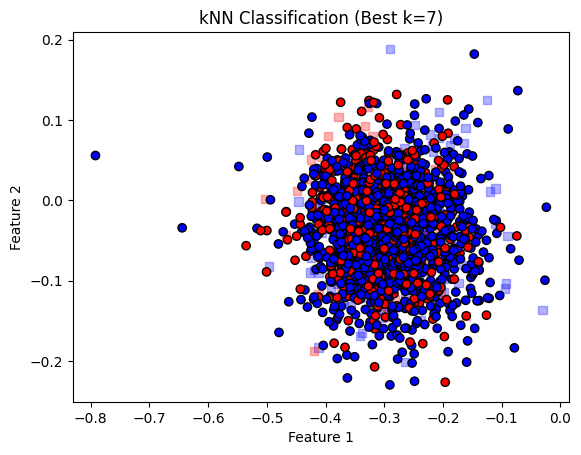

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Verify file presence
data_path = "Judgment_Embeddings_InLegalBERT.xlsx"
if not pd.io.common.file_exists(data_path):
    raise FileNotFoundError(f"Error: File '{data_path}' is missing.")

# Load and validate data
data_frame = pd.read_excel(data_path)
if 'Label' not in data_frame.columns:
    raise ValueError(f"Error: 'Label' column missing. Columns found: {data_frame.columns}")

# Filter for labels 0 and 1
data_filtered = data_frame[data_frame['Label'].isin([0, 1])]
if data_filtered.empty:
    raise ValueError("Error: No data found for labels 0 and 1.")

# Feature and target extraction
X_vals = data_filtered.drop(columns=['Label']).values
y_vals = data_filtered['Label'].values
if X_vals.size == 0 or y_vals.size == 0:
    raise ValueError("Error: Empty feature or label sets.")

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_vals, y_vals, test_size=0.2, random_state=42)

# Grid search for best k value
param_space = {'n_neighbors': np.arange(1, 20, 2)}
grid_search = GridSearchCV(KNeighborsClassifier(), param_space, cv=5)
grid_search.fit(X_train, y_train)
best_k = grid_search.best_params_['n_neighbors']
print(f"Optimal k: {best_k}")

# Train optimized kNN model
knn_model = KNeighborsClassifier(n_neighbors=best_k)
knn_model.fit(X_train, y_train)

# Predictions and evaluation
train_predictions = knn_model.predict(X_train)
test_predictions = knn_model.predict(X_test)

print("\nTrain Confusion Matrix:\n", confusion_matrix(y_train, train_predictions))
print("Train Report:\n", classification_report(y_train, train_predictions))
print("\nTest Confusion Matrix:\n", confusion_matrix(y_test, test_predictions))
print("Test Report:\n", classification_report(y_test, test_predictions))

print(f"\nTrain Accuracy: {accuracy_score(y_train, train_predictions):.4f}")
print(f"Test Accuracy: {accuracy_score(y_test, test_predictions):.4f}")
